# Customer-Personality Segmentation Clustering

## Project Overview

link dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

Analisis Kepribadian Pelanggan adalah analisis terperinci tentang pelanggan ideal perusahaan. Ini membantu bisnis untuk lebih memahami pelanggannya dan mempermudah mereka untuk memodifikasi produk sesuai dengan kebutuhan, perilaku, dan perhatian khusus dari berbagai jenis pelanggan.

Analisis kepribadian pelanggan membantu bisnis untuk memodifikasi produknya berdasarkan target pelanggannya dari berbagai jenis segmen pelanggan. Misalnya, daripada menghabiskan uang untuk memasarkan produk baru ke setiap pelanggan di database perusahaan, perusahaan dapat menganalisis segmen pelanggan mana yang paling mungkin membeli produk dan kemudian memasarkan produk hanya pada segmen tertentu tersebut.

PEOPLE
* ID: Customer's unique identifier.
* Year_Birth: Customer's birth year.
* Education: Customer's education level.
* Marital_Status: Customer's marital status.
* Income: Customer's yearly household income.
* Kidhome: Number of children in customer's household.
* Teenhome: Number of teenagers in customer's household.
* Dt_Customer: Date of customer's enrollment with the company.
* Recency: Number of days since customer's last purchase.
* Complain: 1 if customer complained in the last 2 years, 0 otherwise.

PRODUCTS

* MntWines: Amount spent on wine in last 2 years.
* MntFruits: Amount spent on fruits in last 2 years.
* MntMeatProducts: Amount spent on meat in last 2 years.
* MntFishProducts: Amount spent on fish in last 2 years.
* MntSweetProducts: Amount spent on sweets in last 2 years.
* MntGoldProds: Amount spent on gold in last 2 years.

PROMOTION

* NumDealsPurchases: Number of purchases made with a discount.
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise.

PLACE

* NumWebPurchases: Number of purchases made through the company’s web site.
* NumCatalogPurchases: Number of purchases made using a catalogue.
* NumStorePurchases: Number of purchases made directly in stores.
* NumWebVisitsMonth: Number of visits to company’s web site in the last month.

## IMPORT DATA & MODULE

### Load data menggunakan API KAGGLE

In [1]:
# C:\Users\USER\.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syahmisajid12","key":"******************"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

#### Load Data dari Kaggle

In [3]:
!kaggle datasets download -d imakash3011/customer-personality-analysis

  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 65.8MB/s]


#### Import Module

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Function

In [5]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import unzip_data

--2023-06-29 07:00:17--  https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11485 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.22K  --.-KB/s    in 0s      

2023-06-29 07:00:17 (81.7 MB/s) - ‘helper_functions.py’ saved [11485/11485]



## EXPLORATORY DATA ANALYSIS

In [6]:
unzip_data("/content/customer-personality-analysis.zip")

In [7]:
df = pd.read_csv('/content/marketing_campaign.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Feature/Kolom

#### Mengecek Nama Kolom

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

#### Mengecek Jumlah Data & Kolom

In [9]:
df.shape

(2240, 29)

#### Mengecek Non-null data & Tipe Data Setiap Kolom

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Basic Statistics

In [11]:
#LETS DO THE BASIC STATISTICS ON CONTINOUS FEATURES...
df.describe().style.background_gradient(cmap='Greys')

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.000000,11.000000,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.000000,0.000000,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000


### Jumlah Unik Value Masing-masing Feature

In [12]:
#FINDING THE NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN...
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

### Melihat Range Tanggal Transaksi

In [13]:
df["Dt_Customer"]

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [14]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

print(df["Dt_Customer"].head(10))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08
0   2012-04-09
1   2014-08-03
2   2013-08-21
3   2014-10-02
4   2014-01-19
5   2013-09-09
6   2012-11-13
7   2013-08-05
8   2013-06-06
9   2014-03-13
Name: Dt_Customer, dtype: datetime64[ns]


<ipython-input-14-7a3b35ddc803>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])


### Marital_Status & Education

Sekarang kita akan menjelajahi nilai unik dalam fitur kategorikal untuk mendapatkan gambaran yang jelas tentang data.

In [15]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


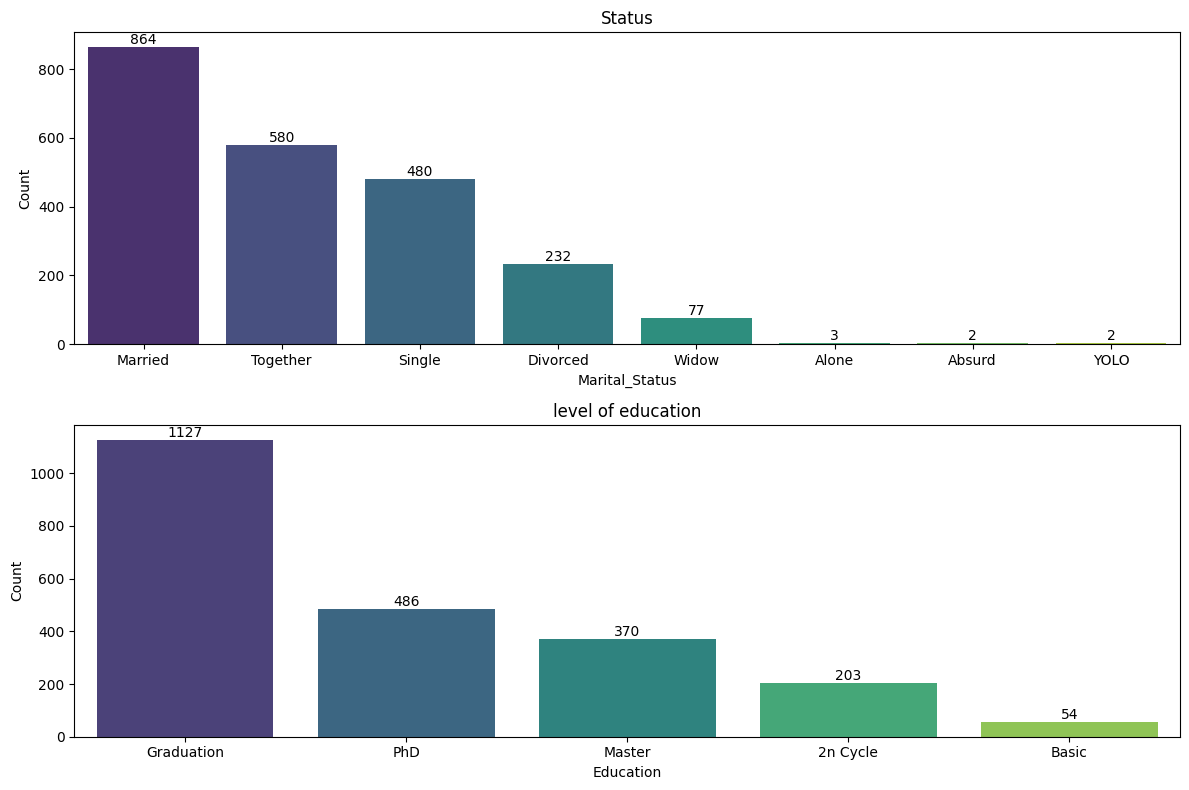

In [16]:
Marital_Status = df['Marital_Status'].value_counts()
Education = df['Education'].value_counts()

plt.figure(figsize=(12, 8))

# Bar plot for Employee Residence
plt.subplot(2, 1, 1)
sns.barplot(y=Marital_Status.values, x=Marital_Status.index,
            palette='viridis')
plt.title('Status')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
# plt.xticks(rotation=45)
for i, value in enumerate(Marital_Status.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Bar plot for Company Location
plt.subplot(2, 1, 2)
sns.barplot(y=Education.values, x=Education.index,
            palette='viridis')
plt.title('level of education')
plt.xlabel('Education')
plt.ylabel('Count')
# plt.xticks(rotation=45)
for i, value in enumerate(Education.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Education Level
* 97.58% of Customers in the dataset are "Post Graduate".
* 2.410% of Customers in the dataset are "Under Graduate".

Married Status
* 64.46% of Customers in the dataset are in "Relationship".
* 35.53% of Customers in the dataset are "Single".

### AcceptedCmp

In [17]:
print(df['AcceptedCmp1'].unique())
print(df['AcceptedCmp2'].unique())
print(df['AcceptedCmp3'].unique())
print(df['AcceptedCmp4'].unique())
print(df['AcceptedCmp5'].unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [18]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

Unique categories present in the TotalAcceptedCmp: 0    1777
1     325
2      83
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64




<Figure size 800x800 with 0 Axes>

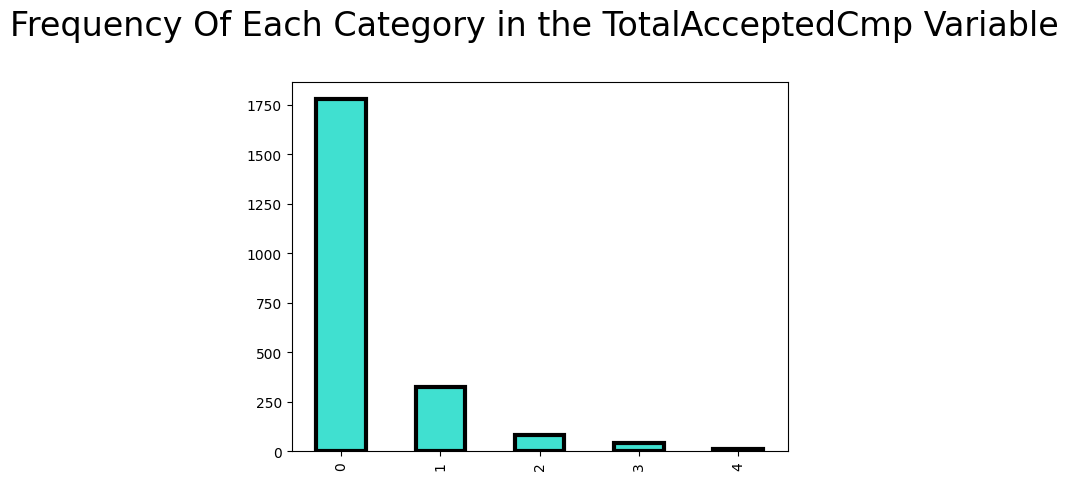

<Figure size 800x800 with 0 Axes>

In [19]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "TotalAcceptedCmp"
print("Unique categories present in the TotalAcceptedCmp:",df['TotalAcceptedCmp'].value_counts())
print("\n")

#VISUALIZING THE "TotalAcceptedCmp"
df['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

In [20]:
#Dropping some of the redundant features
to_drop = ["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]
df = df.drop(to_drop, axis=1)

* 79,33% Pelanggan yang menerima penawaran dalam kampanye adalah "0".
* 14,50% Pelanggan yang menerima penawaran dalam kampanye adalah "1".
* 3,70% dari Pelanggan yang menerima penawaran dalam kampanye adalah "2".
* 1,96% Pelanggan yang menerima penawaran dalam kampanye adalah "3".
* 0,49% dari Pelanggan yang menerima penawaran dalam kampanye adalah "4".

### Num Purchases

In [21]:
print(df['NumWebPurchases'].unique())
print(df['NumCatalogPurchases'].unique())
print(df['NumStorePurchases'].unique())
print(df['NumDealsPurchases'].unique())

[ 8  1  2  5  6  7  4  3 11  0 27 10  9 23 25]
[10  1  2  0  3  4  6 28  9  5  8  7 11 22]
[ 4  2 10  6  7  0  3  8  5 12  9 13 11  1]
[ 3  2  1  5  4 15  7  0  6  9 12  8 10 13 11]


In [22]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44])

In [23]:
print(f"Nilai Terkecil: {df['NumTotalPurchases'].min()}")
print(f"Nilai Terbesar: {df['NumTotalPurchases'].max()}")
print(f"Nilai Rata-rata: {df['NumTotalPurchases'].mean()}")

Nilai Terkecil: 0
Nilai Terbesar: 44
Nilai Rata-rata: 14.862053571428572


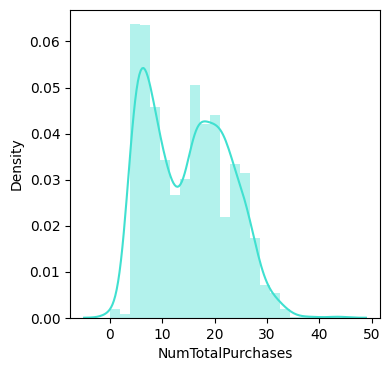

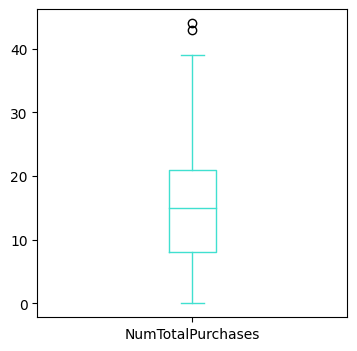

In [24]:
import warnings

# Mengabaikan semua peringatan
warnings.filterwarnings("ignore")

plt.figure(figsize=(4,4))
sns.distplot(df["NumTotalPurchases"],color = 'turquoise')
plt.show()
df["NumTotalPurchases"].plot.box(figsize=(4,4),color = 'turquoise')
plt.show()

In [25]:
#Dropping some of the redundant features
to_drop = ["NumWebPurchases", "NumCatalogPurchases","NumStorePurchases", "NumDealsPurchases"]
df = df.drop(to_drop, axis=1)

### Feature Mnt

In [26]:
#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [27]:
df['Spent'].nunique()

1054

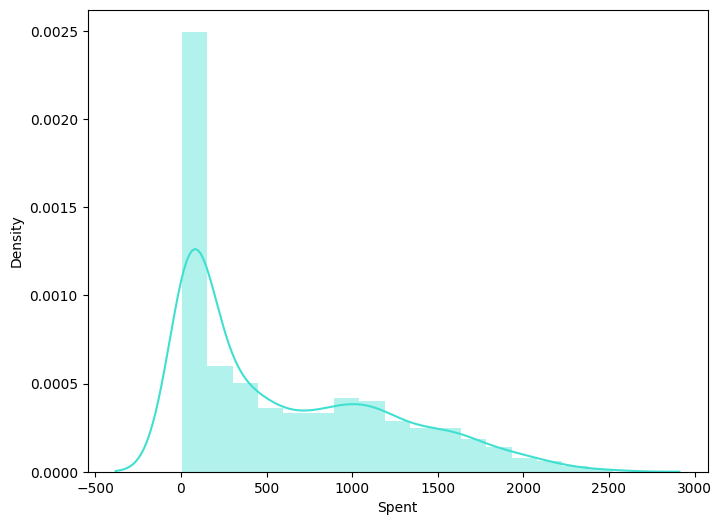

In [28]:
import warnings

# Mengabaikan semua peringatan
warnings.filterwarnings("ignore")

plt.figure(figsize=(8,6))
sns.distplot(df["Spent"],color = 'turquoise')
plt.show()

## Data Pre Processing

### Data Cleaninng

In [29]:
#PERCENTAGE OF THE MISSING VALUES - DATAFRAME.....
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df).style.background_gradient(cmap='Greys')

,Total,Percentage
Income,24,1.071429
ID,0,0.000000
MntFishProducts,0,0.000000
NumTotalPurchases,0,0.000000
TotalAcceptedCmp,0,0.000000
Response,0,0.000000
Z_Revenue,0,0.000000
Z_CostContact,0,0.000000
Complain,0,0.000000
NumWebVisitsMonth,0,0.000000


Terdapat null pada Kolom Income

In [30]:
#To remove the NA values
df = df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 2216


#### Mengecek Nilai Duplikat

In [31]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,TotalAcceptedCmp,NumTotalPurchases,Spent


Tidak ada data duplikat

#### Droping the unwanted feature

In [32]:
#FINDING THE NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN...
df.nunique()

ID                   2216
Year_Birth             59
Education               5
Marital_Status          8
Income               1974
Kidhome                 3
Teenhome                3
Dt_Customer           662
Recency               100
MntWines              776
MntFruits             158
MntMeatProducts       554
MntFishProducts       182
MntSweetProducts      176
MntGoldProds          212
NumWebVisitsMonth      16
Complain                2
Z_CostContact           1
Z_Revenue               1
Response                2
TotalAcceptedCmp        5
NumTotalPurchases      39
Spent                1047
dtype: int64

Dalam sel di atas "Z_CostContact" dan "Z_Revenue" memiliki nilai yang sama di semua baris, itulah sebabnya, mereka tidak akan berkontribusi apa pun dalam pembuatan model. Jadi kita bisa menghilangkan mereka.

In [33]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head(5).style.background_gradient(cmap='Greys')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,Response,TotalAcceptedCmp,NumTotalPurchases,Spent
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-04-09 00:00:00,58,635,88,546,172,88,88,7,0,1,0,25,1617
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-08-03 00:00:00,38,11,1,6,2,1,6,5,0,0,0,6,27
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21 00:00:00,26,426,49,127,111,21,42,4,0,0,0,21,776
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-10-02 00:00:00,26,11,4,20,10,3,5,6,0,0,0,8,53
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19 00:00:00,94,173,43,118,46,27,15,5,0,0,0,19,422


#### Create New Feature

Berikutnya, saya akan melakukan langkah-langkah berikut untuk merekayasa beberapa fitur baru:

* Ekstrak "Age" pelanggan dengan "Year_Birth" yang menunjukkan tahun kelahiran orang yang bersangkutan.
* Buat fitur lain "Spent" yang menunjukkan jumlah total yang dibelanjakan pelanggan dalam berbagai kategori selama rentang waktu dua tahun.
* Buat fitur lain "Living_With" dari "Marital_Status" untuk mengekstrak situasi kehidupan pasangan.
* Buat fitur "Children" untuk menunjukkan jumlah anak dalam satu rumah tangga yaitu anak-anak dan remaja.
* Untuk mendapatkan kejelasan lebih lanjut tentang rumah tangga, Membuat fitur yang menunjukkan "Family_Size"
* Buat fitur "Is_Parent" untuk menunjukkan status sebagai orang tua
* Terakhir, saya akan membuat tiga kategori dalam "Pendidikan" dengan menyederhanakan hitungan nilainya.
* Menjatuhkan beberapa fitur yang berlebihan

In [34]:
#Feature Engineering
#Age of customer today
df["Age"] = 2021-df["Year_Birth"]

#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#CHANGING CATEGORY INTO "UG" AND "PG" ONLY....
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')

#For clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer","Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [35]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumWebVisitsMonth',
       'Complain', 'Response', 'TotalAcceptedCmp', 'NumTotalPurchases',
       'Spent', 'Age', 'Living_With', 'Children', 'Is_Parent'],
      dtype='object')

<Axes: >

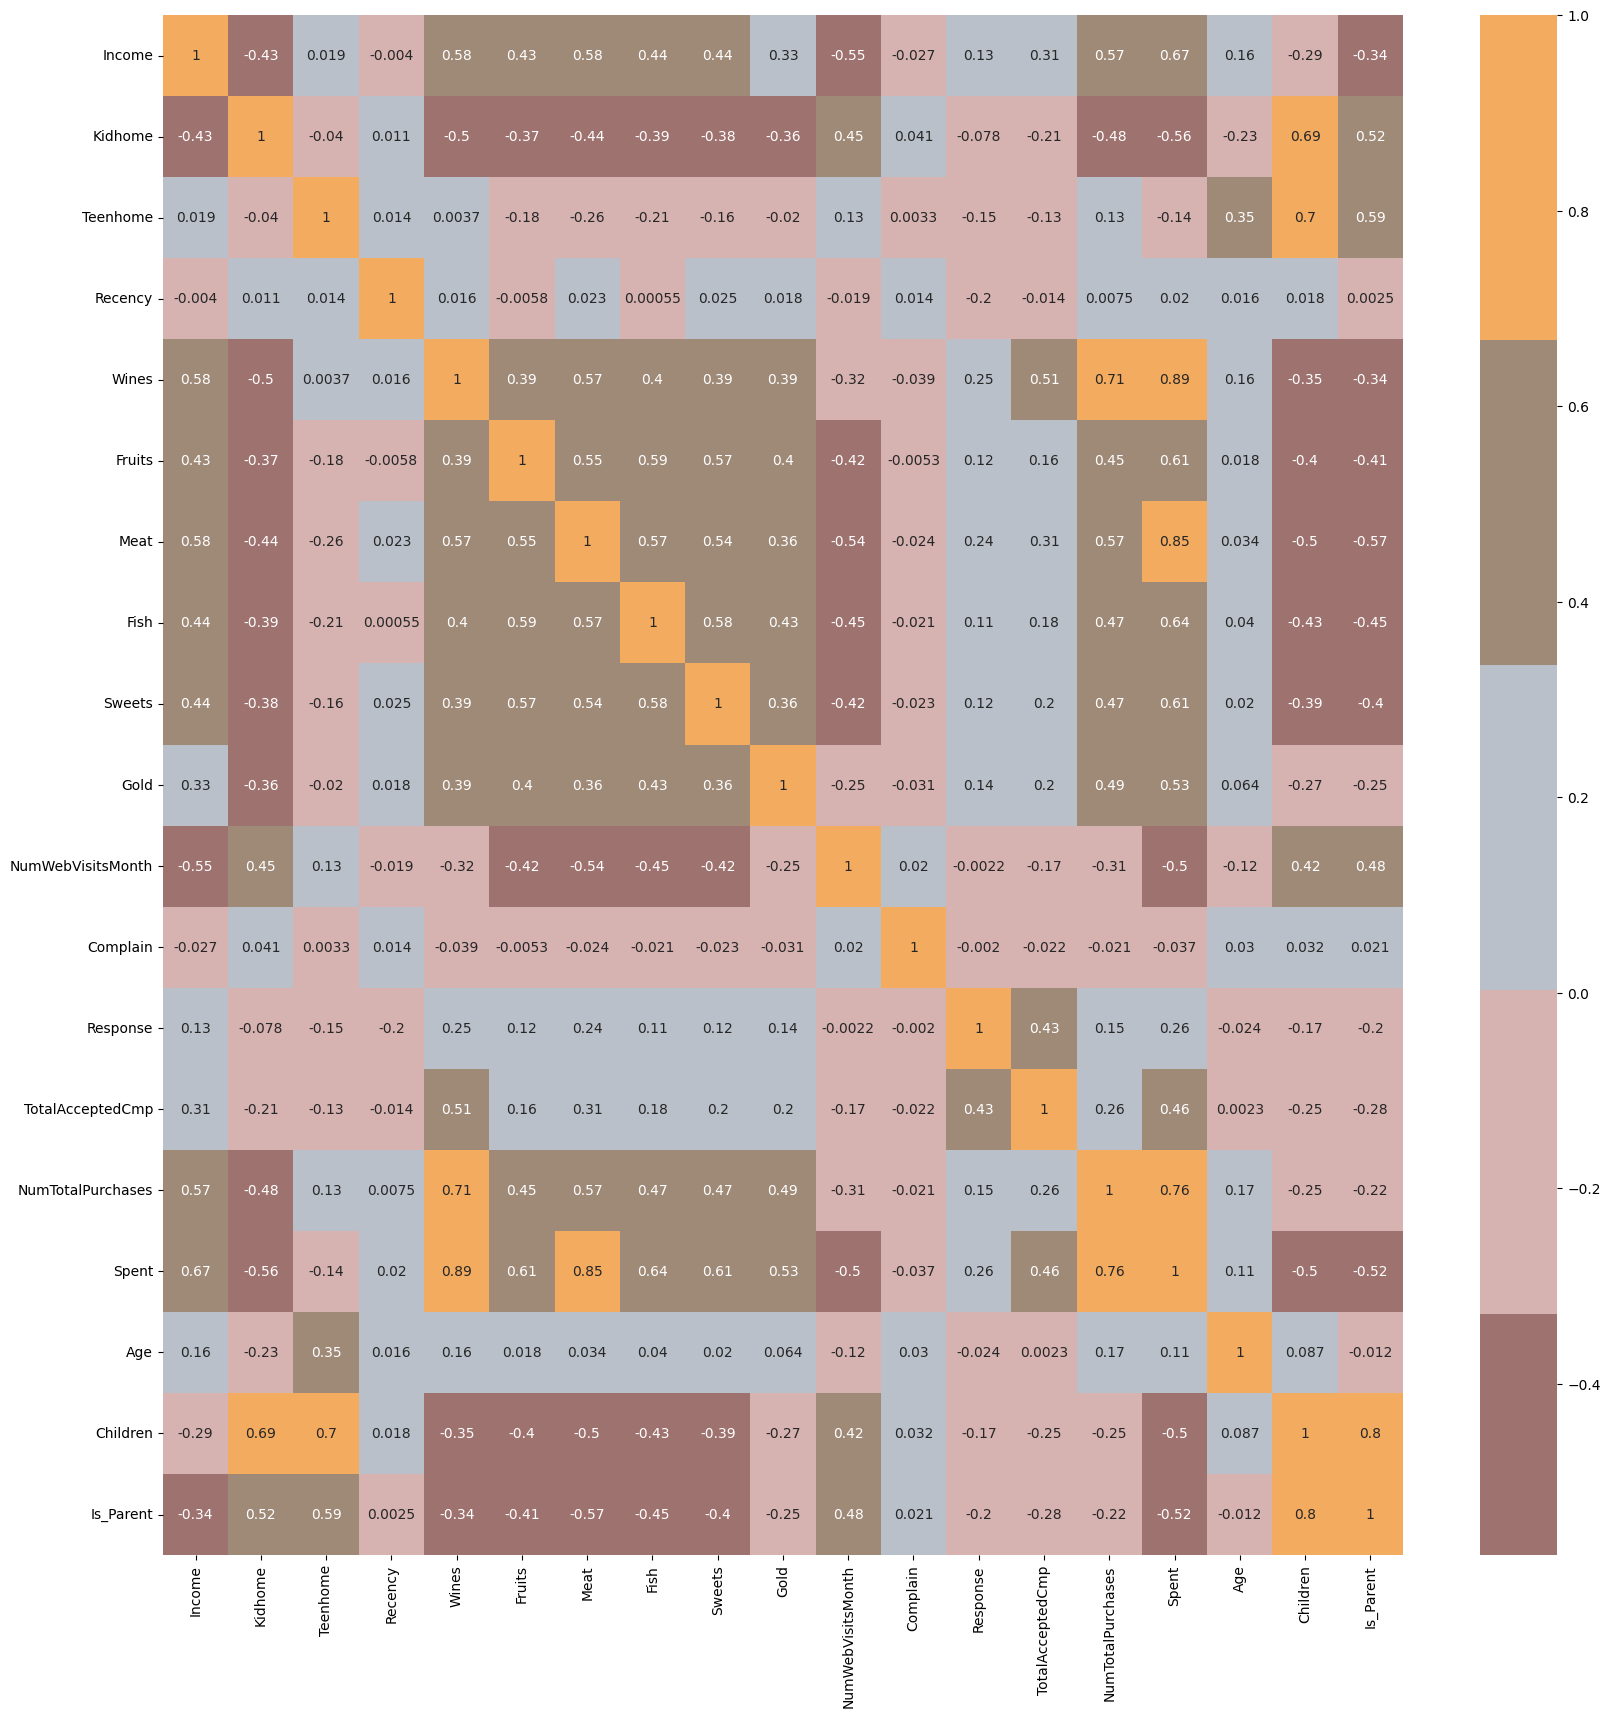

In [39]:
from matplotlib import colors

#correlation matrix
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

corrmat= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

### Scaling

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2216 non-null   object 
 1   Income             2216 non-null   float64
 2   Kidhome            2216 non-null   int64  
 3   Teenhome           2216 non-null   int64  
 4   Recency            2216 non-null   int64  
 5   Wines              2216 non-null   int64  
 6   Fruits             2216 non-null   int64  
 7   Meat               2216 non-null   int64  
 8   Fish               2216 non-null   int64  
 9   Sweets             2216 non-null   int64  
 10  Gold               2216 non-null   int64  
 11  NumWebVisitsMonth  2216 non-null   int64  
 12  Complain           2216 non-null   int64  
 13  Response           2216 non-null   int64  
 14  TotalAcceptedCmp   2216 non-null   int64  
 15  NumTotalPurchases  2216 non-null   int64  
 16  Spent              2216 

Masih ada beberapa feature bernilai object

In [41]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Education', 'Living_With']

In [42]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2216 non-null   int64  
 1   Income             2216 non-null   float64
 2   Kidhome            2216 non-null   int64  
 3   Teenhome           2216 non-null   int64  
 4   Recency            2216 non-null   int64  
 5   Wines              2216 non-null   int64  
 6   Fruits             2216 non-null   int64  
 7   Meat               2216 non-null   int64  
 8   Fish               2216 non-null   int64  
 9   Sweets             2216 non-null   int64  
 10  Gold               2216 non-null   int64  
 11  NumWebVisitsMonth  2216 non-null   int64  
 12  Complain           2216 non-null   int64  
 13  Response           2216 non-null   int64  
 14  TotalAcceptedCmp   2216 non-null   int64  
 15  NumTotalPurchases  2216 non-null   int64  
 16  Spent              2216 

In [44]:
from sklearn.preprocessing import StandardScaler

#Creating a copy of data
ds = df.copy()

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [45]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebVisitsMonth,Complain,Response,TotalAcceptedCmp,NumTotalPurchases,Spent,Age,Living_With,Children,Is_Parent
0,-0.894187,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,0.693232,-0.097812,2.377952,-0.439265,1.319446,1.675488,0.986443,-1.348829,-1.264803,-1.581389
1,-0.894187,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-0.131574,-0.097812,-0.420530,-0.439265,-1.157987,-0.962358,1.236801,-1.348829,1.405806,0.632356
2,-0.894187,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,-0.543978,-0.097812,-0.420530,-0.439265,0.797881,0.280250,0.318822,0.741384,-1.264803,-1.581389
3,-0.894187,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,0.280829,-0.097812,-0.420530,-0.439265,-0.897205,-0.919224,-1.266777,0.741384,0.070501,0.632356
4,0.569268,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,-0.131574,-0.097812,-0.420530,-0.439265,0.537099,-0.307044,-1.016420,0.741384,0.070501,0.632356


### Dimensionality Reduction

Dalam masalah ini, ada banyak faktor yang menjadi dasar klasifikasi akhir akan dilakukan. Faktor-faktor ini pada dasarnya adalah atribut atau fitur. Semakin tinggi jumlah fitur, semakin sulit untuk bekerja dengannya. Banyak dari fitur ini berkorelasi, dan karenanya berlebihan. Inilah mengapa saya akan melakukan pengurangan dimensi pada fitur yang dipilih sebelum menempatkannya melalui pengklasifikasi.
Pengurangan dimensi adalah proses pengurangan jumlah variabel acak yang dipertimbangkan, dengan memperoleh satu set variabel utama.

* Analisis komponen utama (PCA) adalah teknik untuk mengurangi dimensi dataset tersebut, meningkatkan interpretabilitas tetapi pada saat yang sama meminimalkan kehilangan informasi.

In [46]:
from sklearn.decomposition import PCA

#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,-3.847704e-17,2.665982,-4.514405,-2.360343,-0.779535,2.072735,7.680132
col2,2216.0,6.092199e-17,1.460902,-3.507972,-1.278736,0.019015,1.169774,4.723659
col3,2216.0,-2.404815e-17,1.218621,-2.959325,-0.737997,-0.203223,0.364321,5.399186


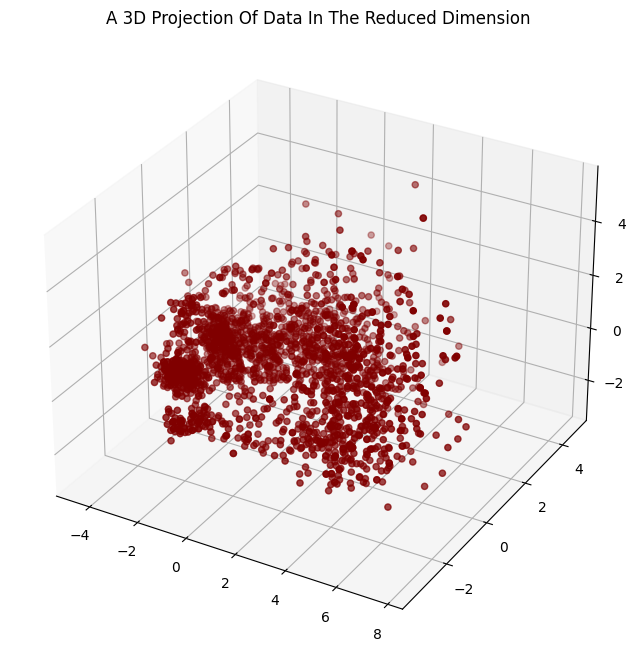

In [47]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Modelling - Clustering

Step:
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

### Elbow

Elbow Method to determine the number of clusters to be formed:


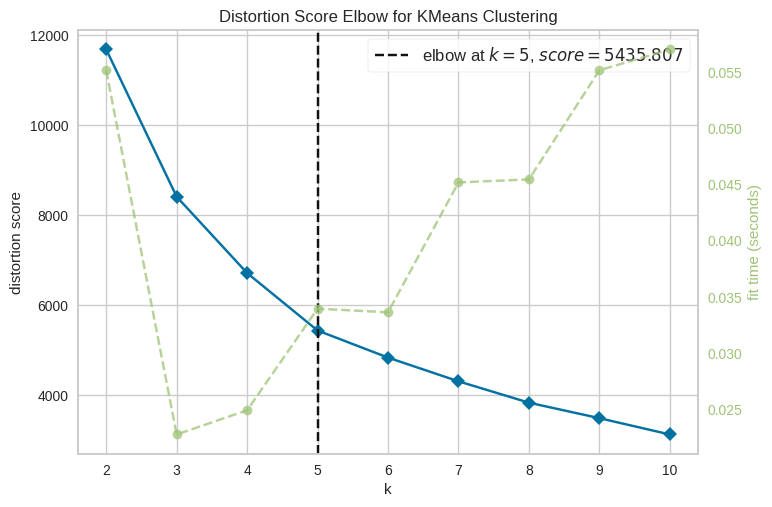

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Menunjukkan bahwa empat akan menjadi jumlah cluster yang optimal untuk data ini. Selanjutnya kita akan melakukan fitting Agglomerative Clustering Model untuk mendapatkan cluster akhir.

In [49]:
from sklearn.cluster import AgglomerativeClustering

#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

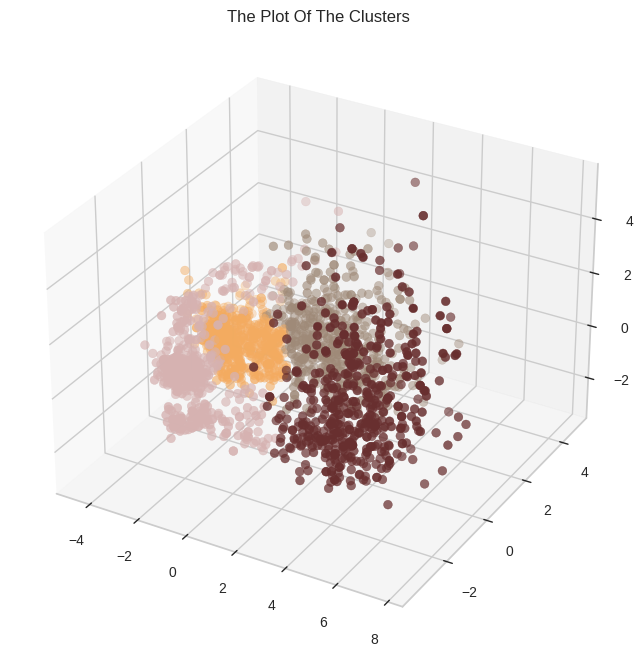

In [50]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

## Evaluation

Karena ini adalah pengelompokan unsupervised learning, jadi tidak memiliki fitur yang diberi tag untuk mengevaluasi atau menilai model kami. Tujuan dari bagian ini adalah untuk mempelajari pola-pola dalam cluster-cluster yang terbentuk dan menentukan sifat dari pola-pola cluster tersebut.

Untuk itu, kita akan melihat data berdasarkan cluster melalui analisis data eksplorasi dan menarik kesimpulan.`

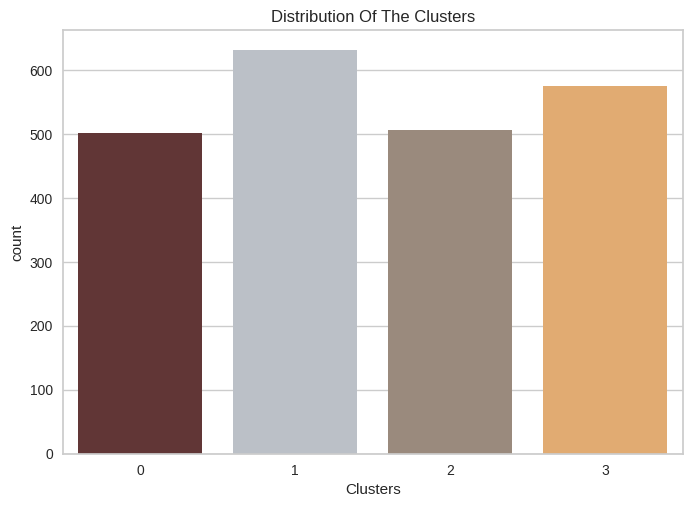

In [51]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

Cluster tampaknya cukup terdistribusi.

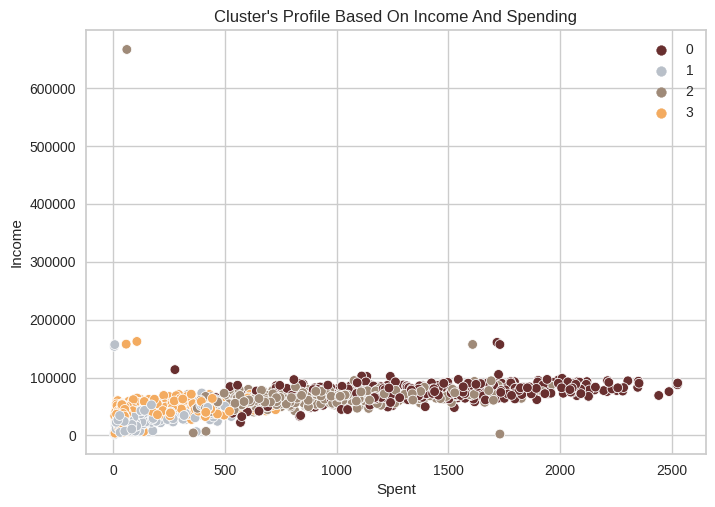

In [52]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Income vs spending plot shows the clusters pattern

* group 0: high spending & high income
* group 1: low spending & low income
* group 2: high spending & average income
* group 3: high spending & low income

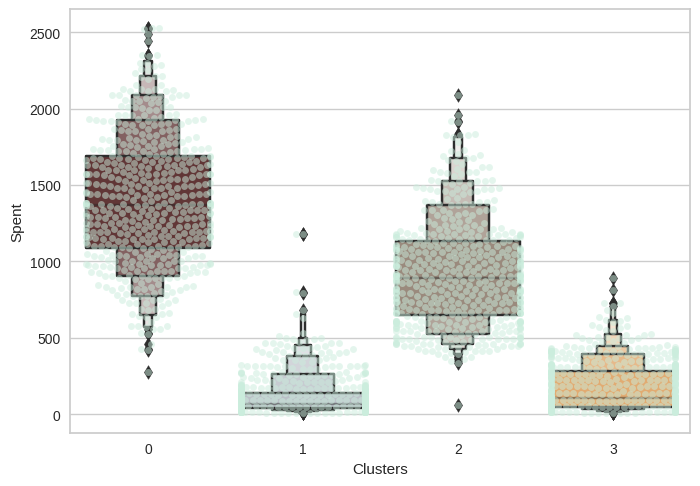

In [53]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"], palette=pal)
plt.show()

Dari plot di atas, dapat dilihat dengan jelas bahwa cluster 0 adalah kumpulan pelanggan terbesar kami diikuti oleh cluster 2. Kita dapat mengeksplorasi apa yang dibelanjakan setiap cluster untuk strategi pemasaran yang ditargetkan.

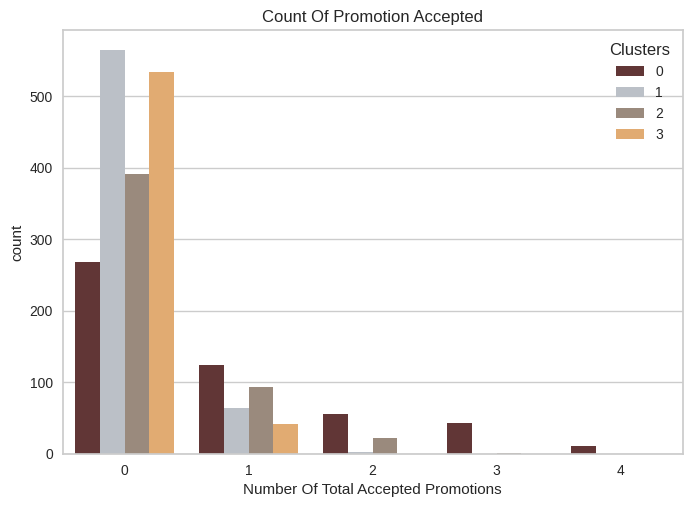

In [54]:
plt.figure()
pl = sns.countplot(x=df["TotalAcceptedCmp"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

Sejauh ini belum ada respons yang luar biasa terhadap kampanye tersebut. Sangat sedikit peserta secara keseluruhan. Selain itu, tidak ada satu bagian pun yang mengambil kelimanya. Mungkin kampanye yang lebih tertarget dan terencana diperlukan untuk meningkatkan penjualan.

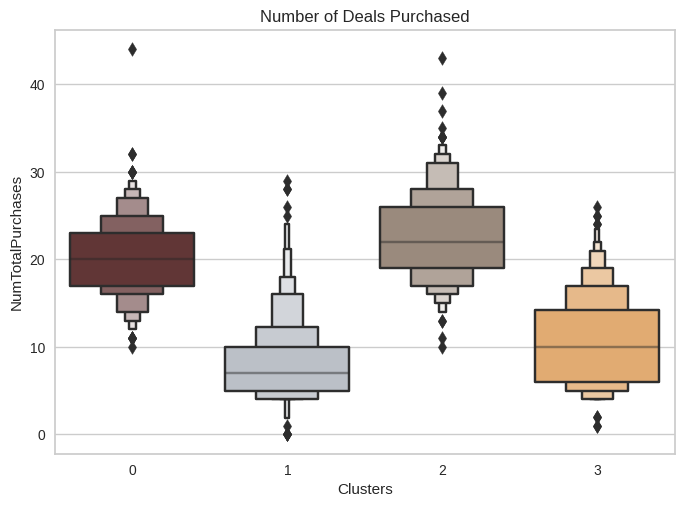

In [55]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumTotalPurchases"],x=df["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Tidak seperti kampanye, penawaran yang ditawarkan berhasil dengan baik. Ini memiliki hasil terbaik dengan cluster 0 dan cluster 2. Namun, pelanggan bintang kami cluster 1 & 3 tidak terlalu tertarik dengan kesepakatan.